## 1. Intro

In [187]:
import pandas as pd
import numpy as np
import spacy

In [188]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [189]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv', encoding='latin1')
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


In [190]:
df['sentiment'].value_counts()

sentiment
0    2000
1    2000
Name: count, dtype: int64

## 2. Preprocessing

### Word Counts

In [191]:
df['word_counts'] = df['twitts'].apply(lambda x : len(str(x).split()))
df.sample(5)

,twitts,sentiment,word_counts
427,we want API! http://tinyurl.com/o49vf9 #wolfra...,0,12
1998,Last ride with my baby girl alexus,0,7
2096,"@FortuneKookie argh, i haven't seen a fortune ...",1,15
3846,"i mostly like you cause you are you, and your ...",1,25
1413,you're my summer in the middle of winter. I mi...,0,19


In [192]:
print(f"max: {df['word_counts'].max()}")
print(f"min: {df['word_counts'].min()}")

max: 32
min: 1


In [193]:
df[df['word_counts'] == 1]

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


### Characters Counts

In [194]:
df['chars_counts'] = df['twitts'].apply(lambda x: len(''.join(str(x).split())))
df.sample(5)

,twitts,sentiment,word_counts,chars_counts
469,@shercole its ok,0,3,14
2613,BANKED at work tonight. &amp; had an amazing w...,1,17,78
1168,@mileycyrus either way it really sucks.,0,6,34
1545,@brittianyerin I KNOW,0,3,19
3148,@DIANALOVESJB thats cool! lol u wanted 2 get r...,1,26,111


### Average Word Length

In [195]:
df['avg_word_length'] = df['chars_counts'] / df['word_counts'] 
df.head()

,twitts,sentiment,word_counts,chars_counts,avg_word_length
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000
1,back in miami. waiting to unboard ship,0,7,32,4.571429
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538


### Stop Words Count

In [196]:
print(stopwords)
print(len(stopwords))

{'say', 'third', 'full', 'during', 'are', 'beside', 'you', 'show', 'from', 'hereupon', 'see', 'every', 'empty', 'against', 'again', 'none', 'put', 'was', 'it', 'out', 'seemed', 'across', 'forty', 'where', 'take', 'other', 'she', 'least', 'in', 'various', 'except', 'themselves', 'a', 'so', 'our', 'yet', 'than', 'indeed', 'toward', 'up', 'anyone', 'formerly', 'while', 'yourselves', 'former', 'too', 'why', 'perhaps', 'well', 'am', 'move', 'hereafter', 'however', 'sometimes', '’ve', 'done', 'give', 'twelve', 'somehow', 'namely', '‘ve', 'becomes', '‘d', 'he', 'very', 'ten', 'hence', '’d', 'for', 'down', 'yourself', 'because', 'them', 'what', 'before', 'all', 'another', 'ourselves', "'s", 'we', 'might', 'many', 'fifty', 'after', '‘ll', 'whereby', 'whole', 'whether', 'keep', 'did', 'hereby', 'made', 'next', '‘m', 'is', 'get', 'side', 'either', 'thence', 'onto', 'one', 'wherever', 'if', 'on', 'somewhere', 'no', 'whom', 'whose', 'its', "n't", 'eleven', 'your', 'besides', 'have', 'whereas', 'eig

In [197]:
df['stop_words_len'] = df['twitts'].apply(lambda x: (len([word for word in x.split() if word in stopwords])))
df.head()

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13


### Count #HashTags and @Mentions

In [198]:
df['hashtags_counts'] = df['twitts'].apply(lambda x: len([word for word in x.split() if word.startswith("#")]))

In [199]:
df['mentions_counts'] = df['twitts'].apply(lambda x: len([word for word in x.split() if word.startswith("@")]))

In [200]:
df.sample(5)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts
3050,@SazFOB now i am listening to 20 dolar nose bl...,1,26,110,4.230769,11,0,1
3086,dude i hate @kirstiealley someone kill her ple...,1,8,42,5.250000,4,0,1
3540,Cleared all the bills for the month. Awesome! ...,1,17,71,4.176471,9,0,0
2560,Going to austin!,1,3,14,4.666667,1,0,0
1874,going to go to sleep on an empty stomach,0,9,32,3.555556,6,0,0


### If numeric digits are present in twitts

In [201]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([word for word in x.split() if word.isdigit()]))
df.sample(5)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count
3065,I love you guys!,1,4,13,3.250000,1,0,0,0
1142,@danielsnyder Well that is exciting for you bu...,0,11,48,4.363636,7,0,1,0
595,I have a tummy ache :&gt; LUZ &lt;:,0,8,28,3.500000,2,0,0,0
3456,No sunshine today.... but i am in love,1,8,31,3.875000,4,0,0,0
662,My wonderful napping plan has just been scrubb...,0,25,112,4.480000,8,0,0,0


### UPPER case words count

In [202]:
df['upper_count'] = df['twitts'].apply(lambda x: len([word for word in x.split() if word.isupper()]))
df.sample(5)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count
702,wish i was thereeee,0,4,16,4.000000,2,0,0,0,0
3929,@taghm AWESOME!!!!! what's your email again? ...,1,16,75,4.687500,7,0,1,0,1
681,@voguedomo haha Yeah! I wanna monroe but my no...,0,12,56,4.666667,4,0,1,0,1
1905,@mandahead my throat has hurt for 3 weeks,0,8,34,4.250000,3,0,1,1,0
3860,Relaxing with no electricity. Its pretty peace...,1,7,43,6.142857,2,0,0,0,0


## 3. Preprocessing and Cleaning

## Lower Case Conversion

In [203]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())
df.sample(5)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count
1893,kennah is so tiny! i just wanted to touch her ...,0,17,63,3.705882,7,0,0,0,1
1406,had dinner at the firehouse in old sacto on tu...,0,15,66,4.400000,6,0,0,0,0
2027,guess who's pretty much moving back to kennesa...,1,9,46,5.111111,3,0,0,0,0
35,"i was rollin' up prince ave, heard all the sir...",0,17,69,4.058824,7,0,0,0,1
3096,most every thing about 2day was blessed aweso...,1,19,79,4.157895,7,0,0,1,1


### Contraction to Expansion

In [204]:
corrections_dict = {
    "a'ight": "alright",
    "ain't": "am not",
    "amn't": "am not",
    " n ": "and",
    "arencha": "are not you",
    "aren't": "are not",
    "bout": "about",
    "can't": "cannot",
    "cap'n": "captain",
    "cause": "because",
    "cuz": "because",
    "cept": "except",
    "c'mon": "come on",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "cuppa": "cup of",
    "daren't": "dare not",
    "daresn't": "dare not",
    "dasn't": "dare not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "dunno": "do not know",
    "d'ya": "do you",
    "e'en": "even",
    "e'er": "ever",
    "em": "them",
    "everybody's": "everybody is",
    "everyone's": "everyone is",
    "everything's": "everything is",
    "finna": "fixing to",
    "fo'c'sle": "forecastle",
    "gainst": "against",
    "g'day": "good day",
    "gimme": "give me",
    "giv'n": "given",
    "gi'z": "give us",
    "gonna": "going to",
    "gon't": "go not",
    "gotta": "got to",
    "hadn't": "had not",
    "had've": "had have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "yes'nt": "yes not",
    "he's": "he is",
    "here's": "here is",
    "how'd": "how would",
    "howdy": "how do you do",
    "how'll": "how will",
    "how're": "how are",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'd'nt": "I would not",
    "I'd'nt've": "I would not have",
    "If'n": "If and when",
    "I'll": "I will",
    "I'm": "I am",
    "Imma": "I am about to",
    "I'm'o": "I am going to",
    "innit": "isn't it",
    "Ion": "I do not",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "Idunno": "I do not know",
    "kinda": "kind of)",
    "let's": "let us",
    "loven't": "love not",
    "mayn't": "may not",
    "may've": "may have",
    "methinks": "I think",
    "mightn't": "might not",
    "might've": "might have",
    "mine's": "mine is",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "must've": "must have",
    "neath": "beneath",
    "needn't": "need not",
    "nal": "and all",
    "ne'er": "never",
    "o'clock": "of the clock",
    "o'er": "over",
    "ol'": "old",
    "round": "around",
    "'s": "is",
    "shan'": "shall not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "so've": "so have",
    "that'll": "that will",
    "that're": "that are",
    "that's": "that is",
    "there'll": "there will",
    "there're": "there are",
    "there's": "there is",
    "these're": "these are",
    "these've": "these have",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "this's": "this is",
    "those're": "those are",
    "those've": "those have",
    "thout": "without",
    "til": "until",
    "tis": "it is",
    "to've": "to have",
    "tryna": "trying to",
    "twas": "it was",
    "tween": "between",
    "twere": "it were",
    "w'all": "we all",
    "w'at": "we at",
    "wanna": "want to",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "whatcha": "what are you",
    "what'd": "what did",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when'd": "when did",
    "where'd": "where did",
    "where'll": "where will",
    "where're": "where are",
    "where's": "where is",
    "where've": "where have",
    "which've": "which have",
    "who'd've": "who would have",
    "who'll": "who will",
    "who're": "who are",
    "who's": "who is",
    "who've": "who have",
    "why'd": "why did",
    "why're": "why are",
    "why's": "why is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'at": "you at",
    "yever": "have you ever",
    "y'know": "you know",
    "yessir": "yes sir",
    "you'd": "you had",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
    "i'm": "i am",
    "dis": "this",
    "bak": "back",
    "brng": "bring"
}

In [205]:
def con_to_exp(x):
    if type(x) is str:
        for key in corrections_dict:
            value = corrections_dict[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [206]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: con_to_exp(x))

291 ms ± 85.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [207]:
df.sample(5)


,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count
2518,@louieaberia hahaha awww how nice. thanks! heh...,1,25,109,4.360000,3,0,1,1,0
2892,"i was at game of s-k-a-t-e in ljubljana, slove...",1,12,69,5.750000,5,0,0,0,2
192,@gkelly work prevented me from attending aweso...,0,7,43,6.142857,2,0,1,0,0
3468,happy 17th of may!!!,1,4,17,4.250000,1,0,0,0,0
2135,first football match i've been to was fun,1,8,34,4.250000,4,0,0,0,0


### Count and Remove Emails

In [208]:
import re

In [209]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0


In [210]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [211]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x))

df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [212]:
df.sample(5)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count
565,@derrickkendall that is if i am not busy murde...,0,17,84,4.941176,8,0,1,0,0,[],0
2268,so how many videos have u made by now like a m...,1,12,42,3.500000,8,0,0,0,0,[],0
675,fixing an old usb mouse gps that apparently ha...,0,25,102,4.080000,12,0,0,0,2,[],0
334,made it all the way to within 50 metres of the...,0,16,64,4.000000,9,0,0,1,0,[],0
1525,@naymez i wish i was on cloud 9,0,8,24,3.000000,2,0,1,1,3,[],0


In [213]:
df[df['emails_count'] > 0]

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [214]:
df['twitts'] = df['twitts'].apply(lambda x:re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', "", x))
df[df['emails_count'] > 0]

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count
3713,@securerecs arghh me please,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


### Counts URL and Remove it

In [215]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall('ftp|ssh|http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)))

In [216]:
df[df['url_flags'] > 0].head()

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count,url_flags
16,@brianquest i made 1 fo u 2: http://bit.ly/eid...,0,19,81,4.263158,3,0,1,1,3,[],0,1
98,heading to work http://twitpic.com/4eojz,0,4,37,9.250000,1,0,0,0,0,[],0,1
99,@blondeblogger http://twitpic.com/4w8hk - i am...,0,10,62,6.200000,4,0,1,0,0,[],0,1
144,i miss you ã¢ââ« http://blip.fm/~8lc2f,0,5,35,7.000000,1,0,0,0,2,[],0,1
183,photo: miss germany http://tumblr.com/xf825f012,0,4,44,11.000000,0,0,0,0,0,[],0,1


In [217]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('ftp|ssh|http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x))

In [218]:
df[df['url_flags'] > 0].head()

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count,url_flags
16,@brianquest i made 1 fo u 2: i tried but its...,0,19,81,4.263158,3,0,1,1,3,[],0,1
98,heading to work,0,4,37,9.250000,1,0,0,0,0,[],0,1
99,@blondeblogger - i am so sad this is so blurry!,0,10,62,6.200000,4,0,1,0,0,[],0,1
144,i miss you ã¢ââ« ~8lc2f,0,5,35,7.000000,1,0,0,0,2,[],0,1
183,photo: miss germany,0,4,44,11.000000,0,0,0,0,0,[],0,1


### Remove RT

In [219]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\brt\b', '', x).strip())

### Special Chars Removal or Ponctuation Removal

In [220]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'[^\w ]+', '', x))
df.sample(3)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count,url_flags
88,eurgh my throat is dry i want a drink,0,9,30,3.333333,4,0,0,0,0,[],0,0
118,i am waiting for my girl to get bk as she flyi...,0,22,70,3.181818,12,0,0,1,1,[],0,0
387,uscweetie wish i could go to the bbq have meet...,0,12,49,4.083333,6,0,1,0,1,[],0,0


### Remove multiple spaces

In [221]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join(x.split()))
df.sample(1)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count,url_flags
583,why does today feel like its going to be a bad...,0,11,40,3.636364,4,0,0,0,0,[],0,0


### Remove HTML tags

In [225]:
from bs4 import BeautifulSoup

In [228]:
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text().strip())
df.sample(5)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count,url_flags
150,just been for a jabebebebebebebebecausezi now ...,0,9,33,3.666667,4,0,0,0,0,[],0,0
2563,bacondsc where,1,2,18,9.000000,0,0,1,0,1,[],0,0
1135,boss545 oh damn babes couldve got my hug and kiss,0,10,42,4.200000,2,0,1,0,0,[],0,0
790,sparksthealy i am really getting tired of it t...,0,22,90,4.090909,9,0,1,0,1,[],0,0
894,hard day for me,0,5,32,6.400000,2,0,0,0,0,[],0,1


### Remove Accented Chars

In [230]:
import unicodedata

In [231]:
def remove_accented_chars(x):
    x = unicodedata.normalize("NFKD", x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

'hello'

In [232]:
df['twitts'] = df['twitts'].apply(lambda x:remove_accented_chars(x))

### Remove Stopwords

In [244]:
df['twitts_no_stop_words'] = df['twitts'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
df.sample(2)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count,url_flags,twitts_no_stop_words
3060,mich3ll3ramir3z heh those things do not usuall...,1,14,72,5.142857,3,0,1,0,1,[],0,0,mich3ll3ramir3z heh things usually spook love ...
2353,lullabyeblues yay so excited to watch it,1,7,39,5.571429,1,0,1,0,1,[],0,0,lullabyeblues yay excited watch


### Convert into base or root form of word

In [248]:
nlp = spacy.load("en_core_web_sm")

In [254]:
def make_to_base(x):
    words = []
    doc = nlp(x)

    for token in doc:
        lemma = str(token.lemma_)

        if lemma == "-PRON-" or lemma == "be":
            lemma = token.text

        words.append(lemma)
    
    return ' '.join(words)

In [255]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))
df.sample(2)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count,url_flags,twitts_no_stop_words
2128,tdrracing interview by the chron and mention t...,1,16,79,4.937500,6,0,1,1,1,[],0,0,tdrracing interviewed chron mentioned tdr aaaa...
1602,kinoflyhigh fuck I should not have leave,0,6,34,5.666667,2,0,1,0,1,[],0,0,kinoflyhigh fuck shouldnt left


### Common words removal

In [260]:
x = "This is this okay and not and balls"
text = ' '.join(df['twitts'])
print(f"Chars: {len(text)}")

Chars: 284430


In [262]:
text = text.split()
print(f"Words: {len(text)}")

Words: 54372


In [269]:
freq_comm = pd.Series(text).value_counts()
freq_20 = freq_comm[:20]
freq_20

I       2882
to      1506
the     1298
a        960
is       915
not      899
my       825
you      766
it       737
and      710
have     623
do       612
in       570
for      521
of       496
am       480
go       470
get      450
on       428
that     393
Name: count, dtype: int64

In [270]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([word for word in x.split() if word not in freq_20]))
df.sample(2)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count,url_flags,twitts_no_stop_words
2075,mileycyrus same here hate lady gaga ow looove she,1,12,48,4.000,4,0,1,0,0,[],0,0,mileycyrus hated lady gaga ow looove
2948,cisco join dow csumb network major,1,8,43,5.375,2,0,0,0,0,[],0,0,cisco joining dow csumb networking major


### Rare words removal

In [273]:
rare20 = freq_comm.tail(20)
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare20]))
df.sample(2)

,twitts,sentiment,word_counts,chars_counts,avg_word_length,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_count,emails,emails_count,url_flags,twitts_no_stop_words
3380,listen music all want find way back into love ...,1,17,59,3.470588,6,0,0,0,1,[],0,0,listening music want find way love la la la
2326,apndrgn sleep well bbi are wait see morrow lol...,1,22,82,3.727273,13,0,1,0,2,[],0,0,apndrgn sleep bbis waiting morrow lol talk u


### Word Cloud Visualization

In [288]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [289]:
text = ' '.join(df['twitts'])

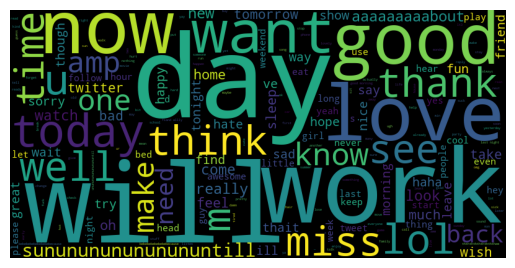

In [290]:
wc = WordCloud(width=800, height=400).generate(text)

plt.imshow(wc)
plt.axis('off')
plt.show()

## 4. Spelling Correction

In [295]:
from textblob import TextBlob

In [317]:
x = "thanks for watching this vidoe. thanks forr sharin"
TextBlob(x).correct()

TextBlob("thanks for watching this video. thanks for sharing")

## 5. Tokenization using TextBlob

In [318]:
x = "thanks#for watching this@vidoe. thanks forr sharin"
TextBlob(x).words

WordList(['thanks', 'for', 'watching', 'this', 'vidoe', 'thanks', 'forr', 'sharin'])

## 6. Detecting Nouns

In [319]:
x = "Breaking News: Tony Jones, the president of the United States is looking to sign a deal."
doc = nlp(x)
for noun in doc.noun_chunks:
    print(noun)

Tony Jones
the president
the United States
a deal
